In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import numpy as np 
import matplotlib.pyplot as plt 

## 1 Reproduire une image

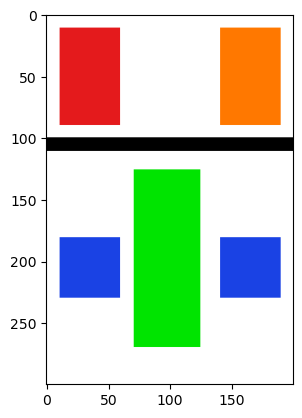

In [66]:
dessin=255*np.ones((300,200,3),dtype=np.uint8)
for i,elem in enumerate(dessin) : 
    for j,ss_elem in enumerate(dessin[i]) : 
        if j > 10 and j < 60 : 
            if i > 10 and i < 90 : 
                dessin[i,j] = [228,26,28]
            if i > 180 and i < 230 : 
                dessin[i,j] = [26,66,228]
        if j > 70 and j < 125 : 
            if i > 125 and i < 270 : 
                dessin[i,j] = [0,228,0]
        if j > 140 and j < 190 : 
            if i > 10 and i < 90 :
                dessin[i,j] = [255,120,0]
            if i > 180 and i < 230 : 
                dessin[i,j] = [26,66,228]
        if i >= 100 and i <= 110 : 
            dessin[i,j] = [0,0,0]
plt.imshow(dessin)
plt.show()

## Division de pixels

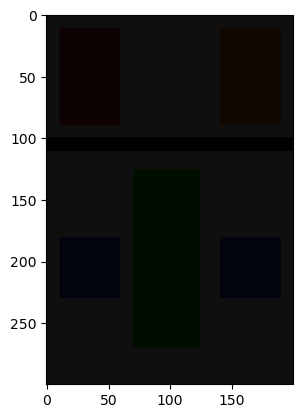

In [67]:
dessin2 = dessin 
plt.imshow(dessin2//16)
plt.show()

## 3 Inverser les couleur => négatif 

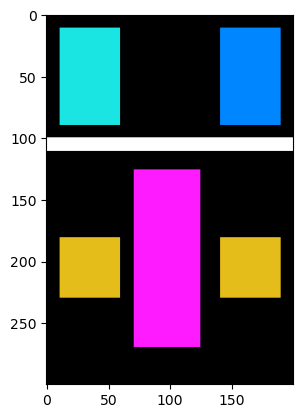

In [68]:
dessin3 = 255 - dessin
plt.imshow(dessin3)
plt.show()

## 4 fonction de gris a partir de RGB 

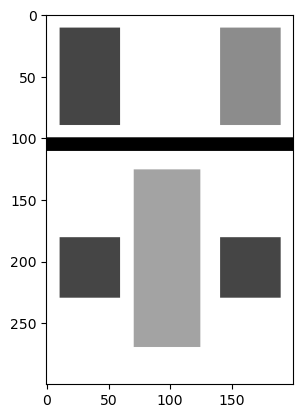

In [69]:
from copy import deepcopy
def gris(image) : 
    res = deepcopy(image)
    for i,elem in enumerate(res) : 
        for j,ss_elem in enumerate(res[i]) : 
            res[i,j] = 0.2125*res[i,j,0] + 0.7154*res[i,j,1] + 0.0721*res[i,j,2]
    return res 
dessin_gris = gris(dessin)
plt.imshow(dessin_gris)
plt.show()

## 5 Importer une image et la transformer en gris 

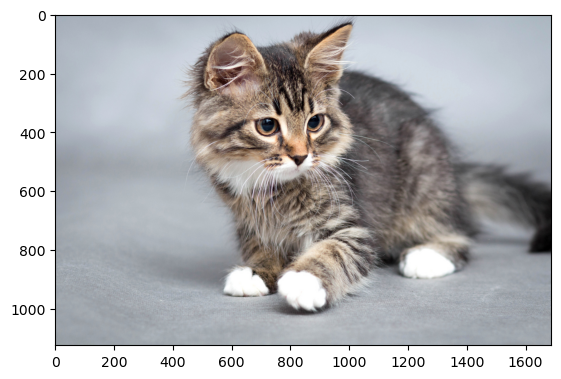

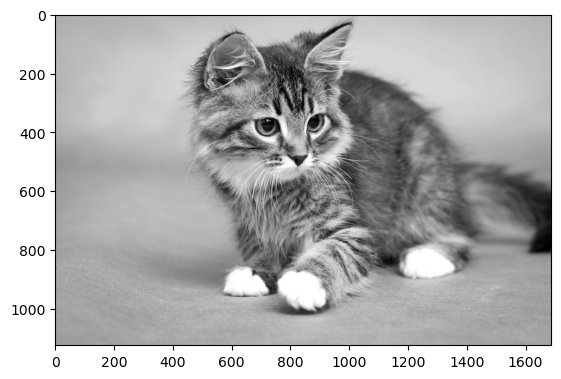

In [85]:
chat = plt.imread("chat.jpg")
plt.imshow(chat)
plt.show()
chat_g = gris(chat)
plt.imshow(chat_g)
plt.show()

## 6 Contours

### a composante horizontale 

C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\2857842292.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i,j] = abs(res[i,j,0]-res[i,j+1,0])


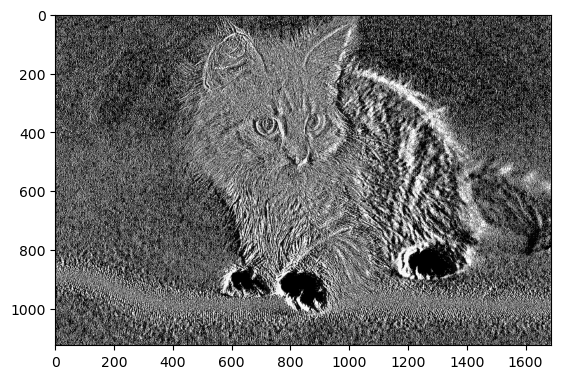

In [83]:
def gradientH(image) : 
    res = deepcopy(image)
    for i in range(np.shape(res)[0]) : 
        for j in range(np.shape(res)[1]-1) :
            res[i,j] = abs(res[i,j,0]-res[i,j+1,0])
    return res
chat_grad_h = gradientH(chat_g)
plt.imshow(chat_grad_h)
plt.show()

C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\2857842292.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i,j] = abs(res[i,j,0]-res[i,j+1,0])


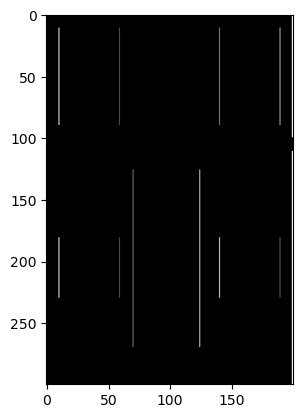

In [84]:
dessin_g_h = gradientH(dessin_gris)
plt.imshow(dessin_g_h)
plt.show()

### b gradient vertical

C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\1607080075.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i,j] = abs(res[i,j,0]-res[i+1,j,0])


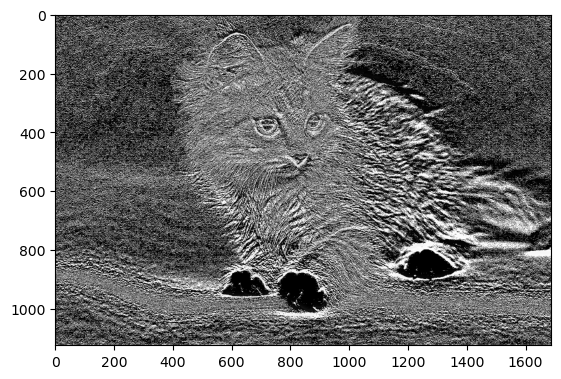

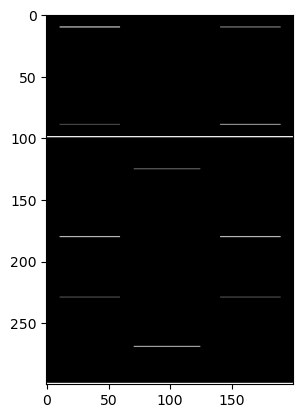

In [87]:
def gradientV(image) : 
    res = deepcopy(image)
    for i in range(np.shape(res)[0]-1) : 
        for j in range(np.shape(res)[1]) :
            res[i,j] = abs(res[i,j,0]-res[i+1,j,0])
    return res
chat_grad_v = gradientV(chat_g)
plt.imshow(chat_grad_v)
plt.show()

dessin_g_v = gradientV(dessin_gris)
plt.imshow(dessin_g_v)
plt.show()

### c sur l'image 

On observe les contours de l'image.

### d combination gradient 

sqrt gradient au carré 

C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\2857842292.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i,j] = abs(res[i,j,0]-res[i,j+1,0])
C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\3399170503.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  grad_tot[i,j] = (h[i,j,0] + v[i,j,0])//2


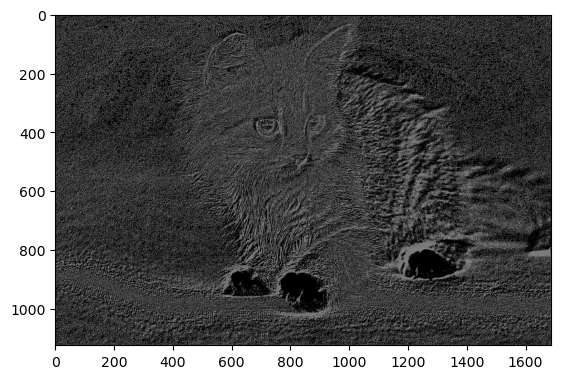

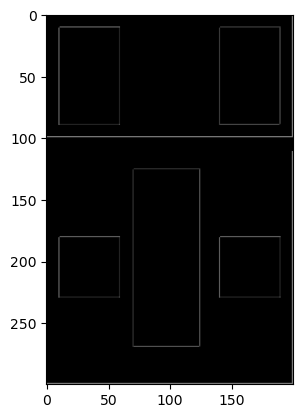

In [97]:
def gradient_tot(image): 
    res = deepcopy(image)
    h = gradientH(res)
    v = gradientV(res)
    grad_tot = np.ones((np.shape(res)),dtype=np.uint8)

    for i in range(np.shape(res)[0]) : 
        for j in range(np.shape(res)[1]) :
            # print((h[i,j,0] + v[i,j,0])//2)
            grad_tot[i,j] = (h[i,j,0] + v[i,j,0])//2
    return grad_tot

chat_grad_v = gradient_tot(chat_g)
plt.imshow(chat_grad_v)
plt.show()

dessin_g_tot = gradient_tot(dessin_gris)
plt.imshow(dessin_g_tot)
plt.show()
    

### e seuillage

<function matplotlib.pyplot.show(close=None, block=None)>

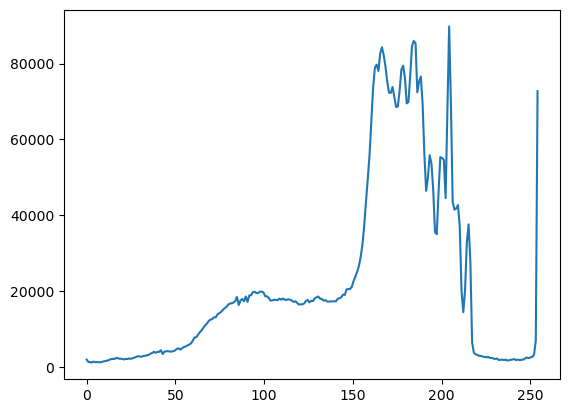

In [98]:
Nombre_pixels,valeur=np.histogram(chat_g,bins=256)
plt.plot(valeur[ :-1],Nombre_pixels)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

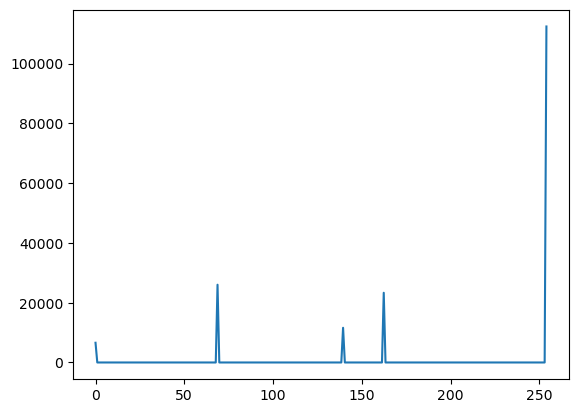

In [99]:
Nombre_pixels,valeur=np.histogram(dessin_gris,bins=256)
plt.plot(valeur[ :-1],Nombre_pixels)
plt.show

C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\2857842292.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i,j] = abs(res[i,j,0]-res[i,j+1,0])
C:\Users\Tom\AppData\Local\Temp\ipykernel_11344\3399170503.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  grad_tot[i,j] = (h[i,j,0] + v[i,j,0])//2


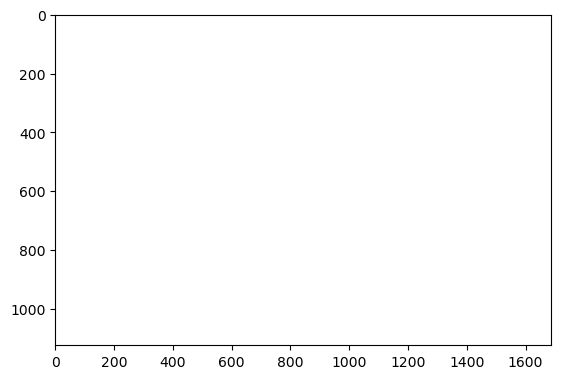

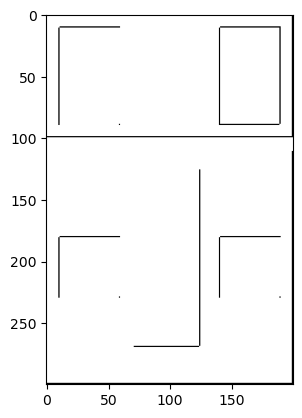

In [101]:
def threshold(image, thr) : 
    res = deepcopy(image)
    grad_tot = gradient_tot(res)

    for i in range(np.shape(res)[0]) : 
        for j in range(np.shape(res)[1]) :
            if grad_tot[i,j,0] > thr : 
                grad_tot[i,j] = 0
            else : 
                grad_tot[i,j] = 255
    return grad_tot

chat_grad_thr = threshold(chat_g,180)
plt.imshow(chat_grad_thr)
plt.show()

dessin_g_thr = threshold(dessin_gris,50)
plt.imshow(dessin_g_thr)
plt.show()